In [26]:
import matplotlib as mpl

mpl.rc('figure', dpi=300, figsize=(10, 15))

import matplotlib.pyplot as plt

In [27]:
from skimage import img_as_bool, img_as_float
from skimage.io import imread, imshow
from skimage.filters import sobel_h
from skimage.feature import canny
from skimage.color import gray2rgb
from skimage.morphology import closing, opening

In [28]:
def pretty_print(img):
    for row in img:
        print('[ ', end='')
        for col in row:
            print("{:.2f}".format(col), end=' ')
        print(']')

In [29]:
from numpy import zeros, ndarray


def _gradient_vertical_(img: ndarray):
    horizontal = zeros(img.shape)

    for i, row in enumerate(img):
        for col in range(1, len(row)):
            dz = row[col] - row[col - 1]
            horizontal[i, col] = dz

    return horizontal


def _gradient_horizontal_(img: ndarray):
    vertical = zeros(img.shape)

    for row in range(1, len(img)):
        for col in range(len(img[row])):
            dz = img[row, col] - img[row - 1, col]
            vertical[row, col] = dz

    return vertical


def gradient(img: ndarray, direction='both'):
    '''
    direction indicates which gradient should be computed:
        - `horizontal` for gradient from top to bottom
        - `vertical` for gradient from left to right
        - `both` vertical and horizontal combined into one.
    '''
    if direction == 'horizontal':
        return _gradient_horizontal_(img)
    elif direction == 'vertical':
        return _gradient_vertical_(img)
    elif direction == 'both':
        grad = zeros(img.shape)

        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                if row > 0:
                    grad[row, col] += img[row, col] - img[row - 1, col]
                if col > 0:
                    grad[row, col] += img[row, col] - img[row, col - 1]

        return grad

In [30]:
def find_horizontal_lines(img) -> list[int]:
    thresh = img.shape[1] / 2
    return [index for index, row in enumerate(img) if sum(row) < thresh]

In [31]:
# import score

In [32]:
# score.binarize('res/test_00.png')
# score.detect_lines('res/test_00.png')

(-0.9882352941176471,
 0.9882352941176471,
 -0.9882352941176471,
 0.9882352941176471)

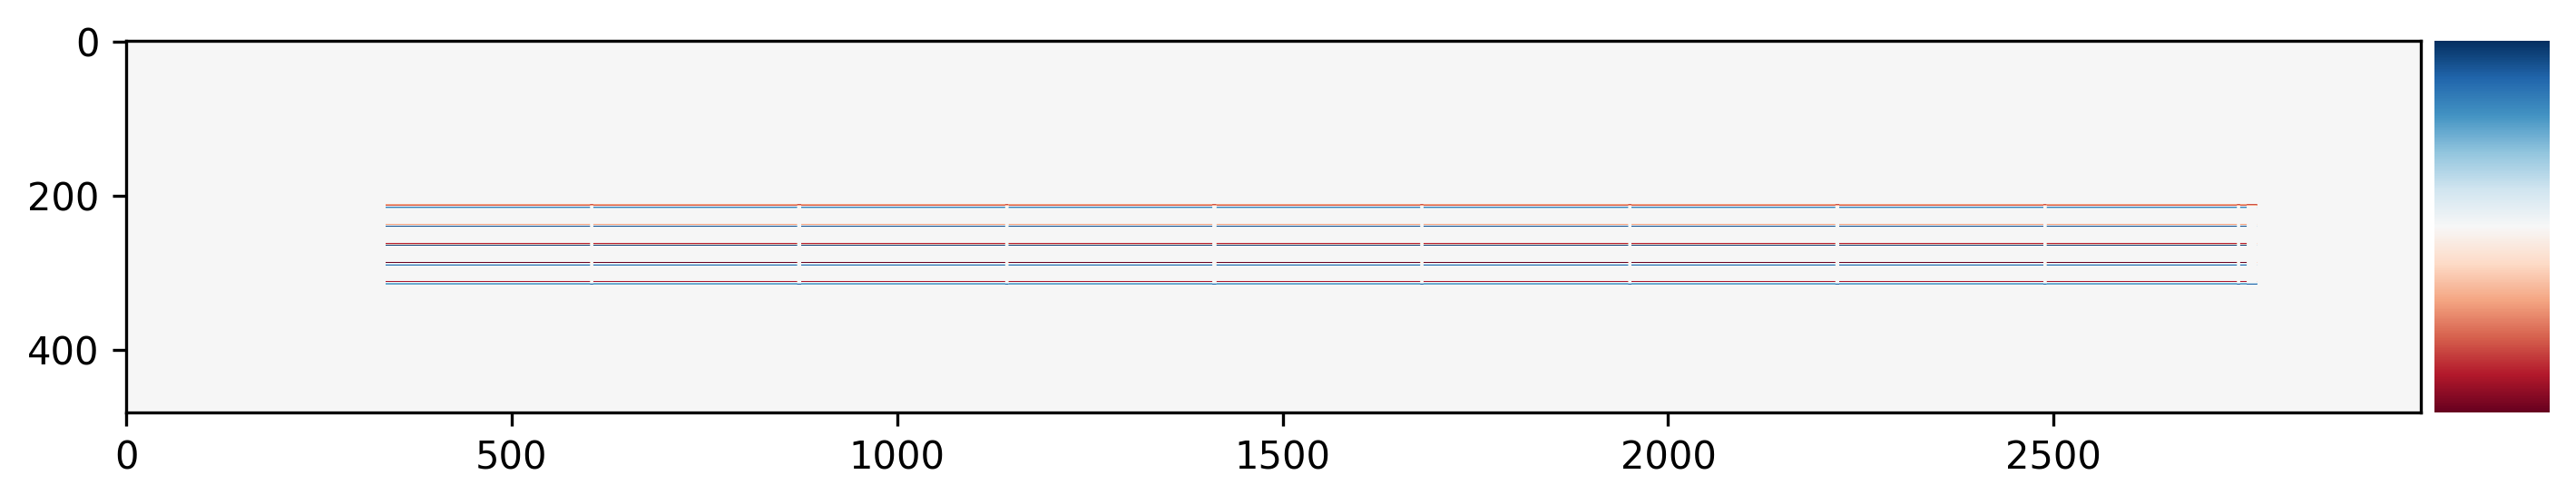

In [34]:
from skimage import img_as_float

src = imread('res/test_empty_staff.png', as_gray=True)
img = gradient(img_as_float(src), direction='horizontal')
with open('processed/gradient.txt', 'w') as out:
    for row in img:
        out.write('[ ')
        for col in row:
            out.write("{:.2f} ".format(col))
        out.write(']\n')
# src = gray2rgb(src)

# for row in img:
#     src[row, :] = [255, 0, 0]

imshow(img)
plt.axis('off')